## In this notebook we study the following single species coagulation reaction with sopantaneous creation and destruction:

\begin{equation}
\begin{split}
    A &\leftrightharpoons_{k_2}^{k_1} \emptyset \\
    B &\leftrightharpoons_{k_2}^{k_1} \emptyset \\
    C &\leftrightharpoons_{k_2}^{k_1} \emptyset \\
\end{split}
\end{equation}

\begin{equation}
    A + B\rightarrow^{k_3} C    
\end{equation}

## Starting from Poisson initial conditions. 

## We numerically solve the Chemical Master Equation by bouding the state space.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sys

sys.path.append('../')
sys.path.append('../src')

from src import cheMASTER


## Setting up the reaction stoichiometry, rates and initial conditions

In [3]:
# Setting up the reactions and the parameters:

#Number of species in the reaction system
num_species     = 3 

#Number of interating reactions in the Hamiltonian
num_interaction = 1 

#This counts the total number of possible reactions in the system.
#We have 2N creation and destruction reactions and the rest interaction reactions
num_reactions   = 2*num_species + num_interaction 

# Rate constants for the reaction system: [k1 is Creation and k2 is Destruction]
k1 = np.array([4,4,3]) #len must be equal to num_species
k2 = np.array([3,2,3]) #len must be equal to num_species

# Interaction reactions:
k3 = np.array([1.]) #len must be equal to num_interactions    

#Defining the stoichiometry for the reactions
s_i,r_i = np.zeros([num_interaction,num_species]),np.zeros([num_interaction,num_species])

#Write this for all reactions in the interacting Hamiltonian corresponding to the reaction rate k3
s_i[0] = [0,0,1] 
r_i[0] = [1,1,0]

rxn_par = [k1,k2,k3]

#The initial mean concentration of the species
initial_values = k1/k2


### Define simulation times

In [4]:
tstart = 0.
tfinal = 1.
tstep = 0.01

### Define the cheMASTER class using this data

In [5]:
system = cheMASTER.chemical_system_class(num_interaction,num_species,rxn_par,r_i,s_i)

### Find the steady state means using the top Eigenvalue of the master operator:

In [32]:
cheMASTER.SteadyState_masterOP(system,max_num=[12,15,12]);
system.ss_masterOP

array([1.01756347, 1.52634528, 1.54910255])

### Solve the system using the simple RK4 algorithm:

In [10]:
cheMASTER.initialize_dynamics(system,initial_values,tstart,tfinal,tstep)
cheMASTER.runDynamics(system,max_num=[12,15,12],method = "RK4",variance=True,crossCorrelator=[0,1])

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 150.25it/s]


Text(0, 0.5, '$\\langle \\delta n_A(t) \\delta n_B(t) \\rangle$')

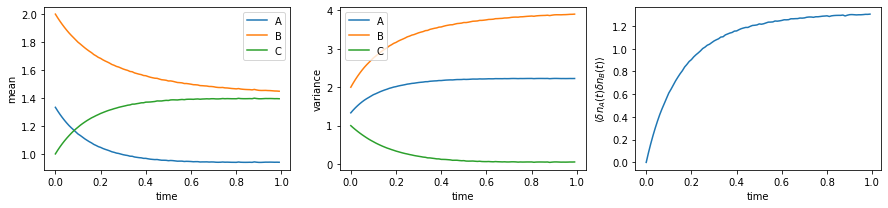

In [16]:
plt.figure(figsize=(15,3))
plt.subplot(131)
for i in range(system.num_species):
    plt.plot(system.timeGrid,system.y[i])
plt.xlabel('time')
plt.ylabel('mean')
plt.legend(['A','B','C'])

plt.subplot(132)
for i in range(system.num_species):
    plt.plot(system.timeGrid,system.variance[i])
plt.xlabel('time')
plt.ylabel('variance')
plt.legend(['A','B','C'])

plt.subplot(133)
plt.plot(system.timeGrid,system.crossC)
plt.xlabel('time')
plt.ylabel(r'$\langle \delta n_A(t) \delta n_B(t) \rangle$')
#plt.legend(['A','B','C'])

### Solve using the Eigenvalue time propagation by diagonalizing the master operator. Also measure the two time connected number cross correlator

In [17]:
cheMASTER.initialize_dynamics(system,initial_values,tstart,tfinal,tstep)
cheMASTER.runDynamics(system,max_num=[12,15,12],method = "Eigenvalue",crossCorrelator_tau='connected')

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [15:23<00:00,  9.23s/it]


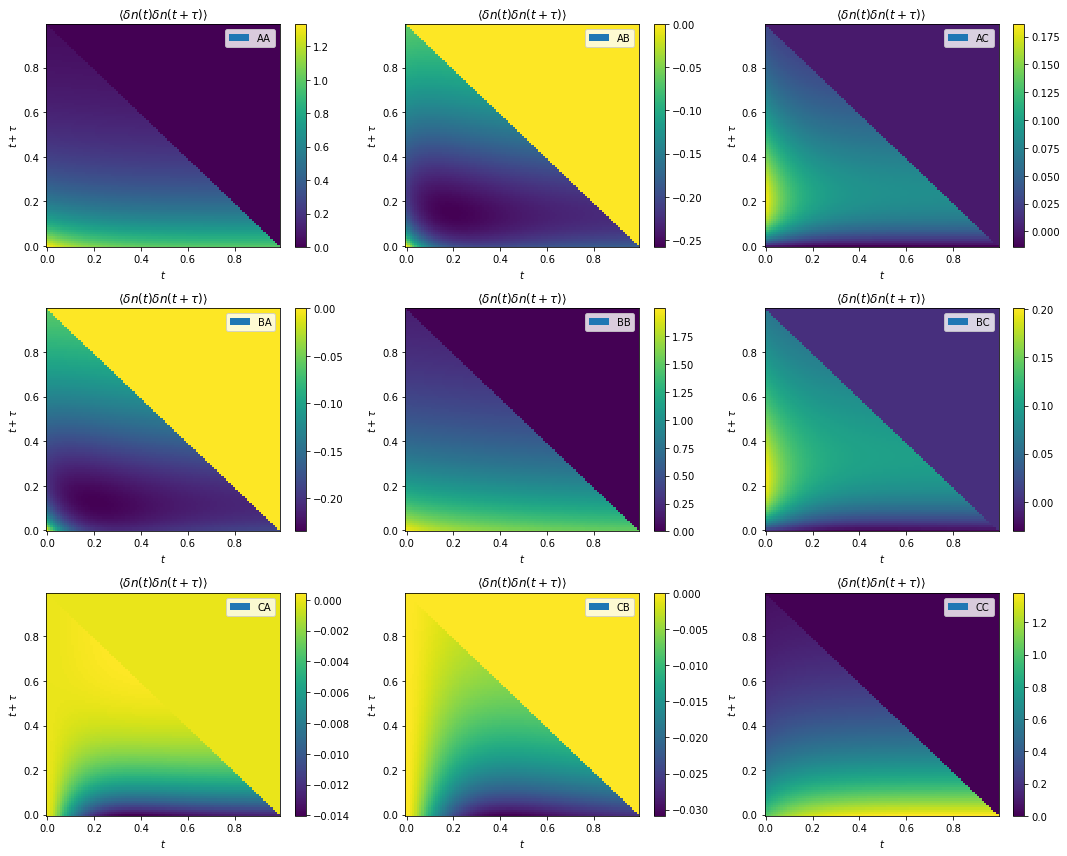

In [30]:
plt.figure(figsize=(15,12))
k=1
for i in range(system.num_species):
    for j in range(system.num_species):
        plt.subplot(3,3,k)
        plt.pcolor(system.timeGrid,system.timeGrid,system.correlator_tau[i,j])
        plt.title(r'$\langle \delta n(t) \delta n(t+\tau) \rangle$')
        plt.xlabel(r'$t$')
        plt.ylabel(r'$t+\tau$')
        plt.colorbar()
        plt.legend([chr(65+i)+chr(65+j)])
        k += 1
plt.tight_layout()

### Solve using the Euler algorithm and measuring the Response function by changing the perturbation rate to 1.1 times the original, for one time step (need smaller time steps with Euler):

In [44]:
cheMASTER.initialize_dynamics(system,initial_values,tstart,tfinal,0.1*tstep)
cheMASTER.runDynamics(system,max_num=[12,15,12],method = "Euler",measureResponse='finite-cross',measureResponse_par=[1.1,1])

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [4:40:21<00:00, 16.82s/it]


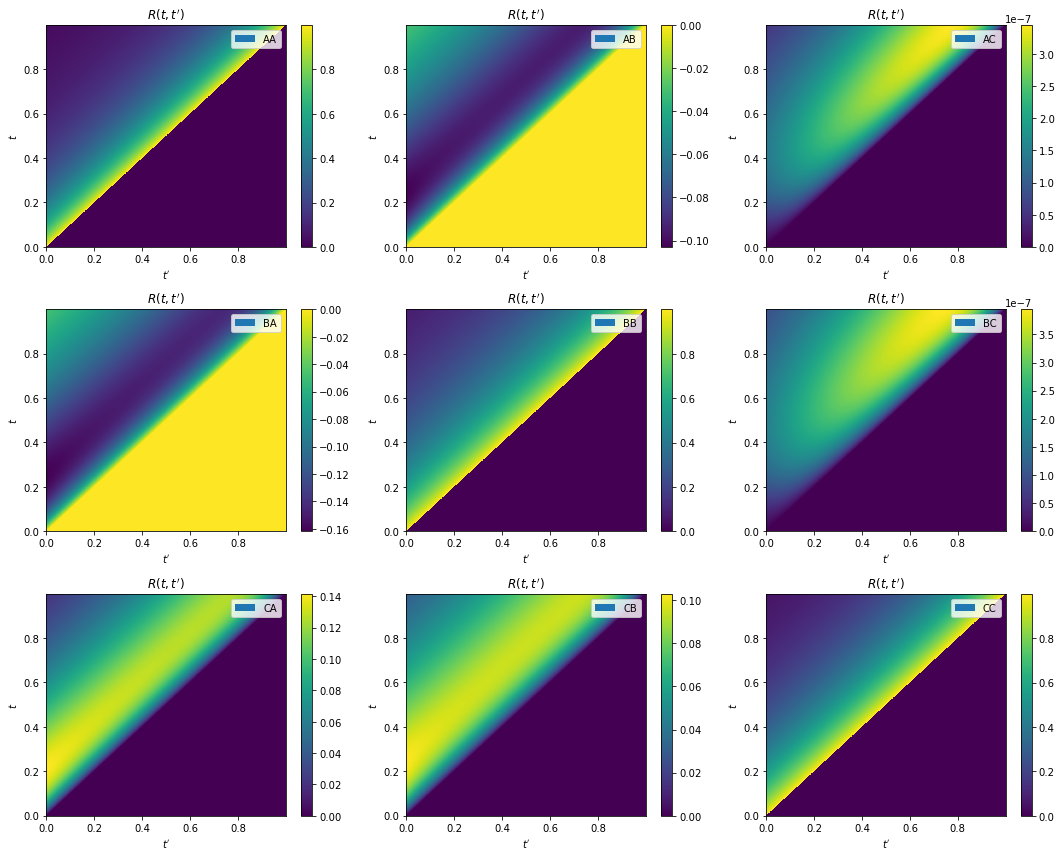

In [48]:
plt.figure(figsize=(15,12))
k=1
for i in range(system.num_species):
    for j in range(system.num_species):
        plt.subplot(3,3,k)
        plt.pcolor(system.timeGrid,system.timeGrid,system.Response[i,j])
        plt.title(r'$R(t,t^\prime)$')
        plt.ylabel(r'$t$')
        plt.xlabel(r'$t^\prime$')
        plt.colorbar()
        plt.legend([chr(65+i)+chr(65+j)])
        k += 1
plt.tight_layout()